##### Copyright 2018 The TensorFlow Authors.

In [3]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 7s 0us/step


In [6]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [14]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [15]:
round(len(images)*0.8)

639

In [16]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [17]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


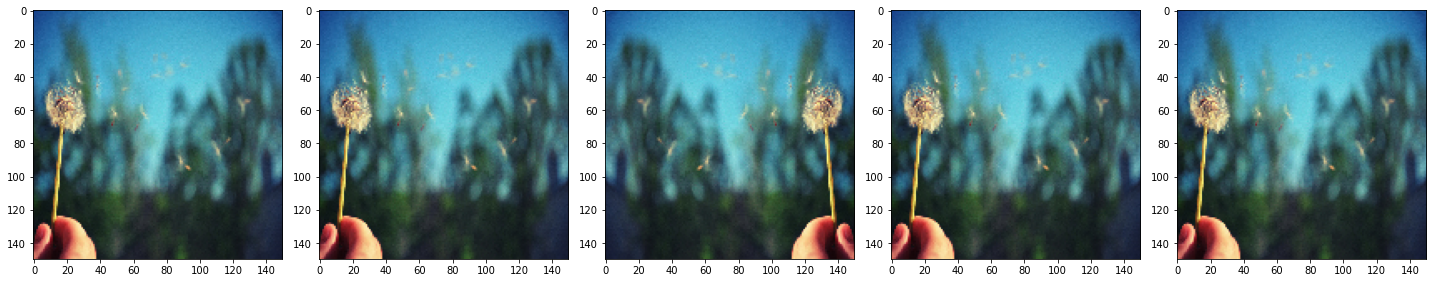

In [19]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [20]:
image_gen = ImageDataGenerator(rescale=1./255,rotation_range=45) 

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


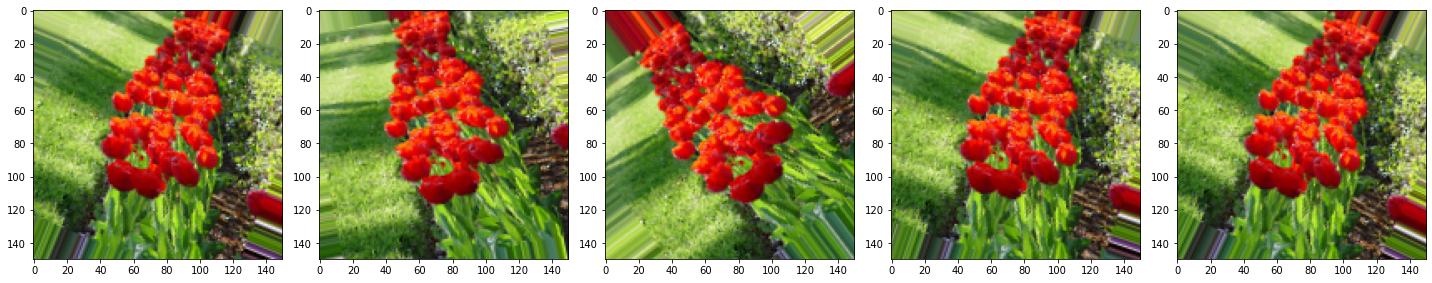

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


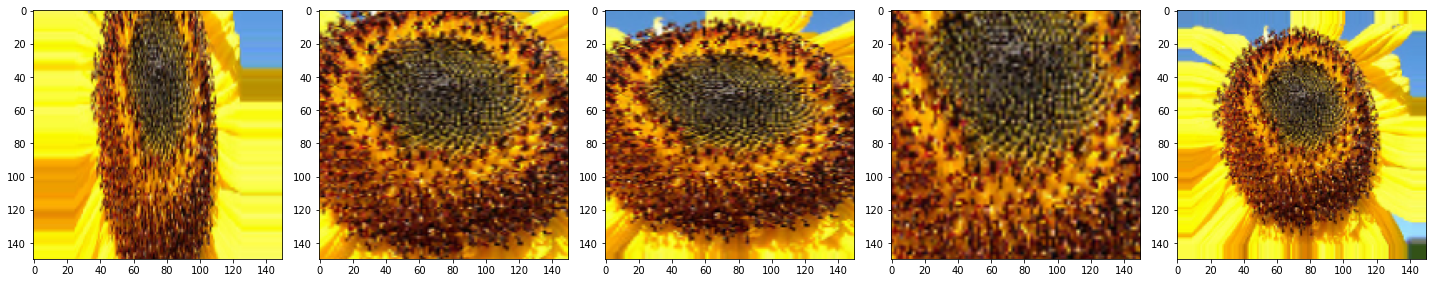

In [23]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [24]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               class_mode="sparse")

Found 2935 images belonging to 5 classes.


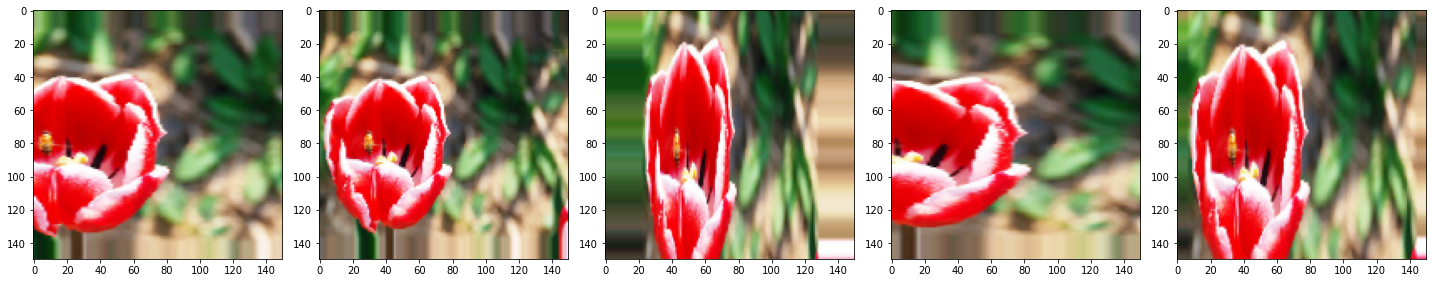

In [25]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [26]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=val_dir,
                                                  target_size=(IMG_SHAPE,IMG_SHAPE),
                                                  class_mode="sparse")

Found 735 images belonging to 5 classes.


In [32]:
model = Sequential()

model.add(Conv2D(16, 3, activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, 3, activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(5, activation="softmax"))

In [33]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
epochs = 35

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(BATCH_SIZE)))
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
30/30 [==============================] - 21s 710ms/step - loss: 0.6907 - accuracy: 0.7407 - val_loss: 0.6518 - val_accuracy: 0.7510
Epoch 2/35
30/30 [==============================] - 21s 700ms/step - loss: 0.7190 - accuracy: 0.7193 - val_loss: 0.7185 - val_accuracy: 0.7075
Epoch 3/35
30/30 [==============================] - 21s 710ms/step - loss: 0.6925 - accuracy: 0.7390 - val_loss: 0.6738 - val_accuracy: 0.7333
Epoch 4/35
30/30 [==============================] - 21s 701ms/step - loss: 0.6746 - accuracy: 0.7404 - val_loss: 0.6626 - val_accuracy: 0.7442
Epoch 5/35
30/30 [==============================] - 21s 706ms/step - loss: 0.6885 - accuracy: 0.7281 - val_loss: 0.6980 - val_accuracy: 0.7088
Epoch 6/35
30/30 [==============================] - 21s 699ms/step - loss: 0.6744 - accuracy: 0.7421 - val_loss: 0.6891 - val_accuracy: 0.7333
Epoch 7/35
30/30 [==============================] - 21s 700ms/step - loss: 0.6661 - accuracy: 0.7482 - val_loss: 0.6823 - val_accuracy: 0.7293

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(epochs)
